<a href="https://colab.research.google.com/github/UrmishaPal/ML-models/blob/main/Flight_delay_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc


## **Import Data**

In [3]:
# cd "/path/to/ypur/data"

In [5]:
pip install kagglehub

In [10]:
import pandas as pd

# Assuming the CSV file is named 'Flight_delay.csv' and is directly within the downloaded path
file_path = f'{path}/Flight_delay.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully from: {file_path}")
print(f"Shape of the DataFrame: {df.shape}")
df.head()

Dataset loaded successfully from: /root/.cache/kagglehub/datasets/undersc0re/flight-delay-and-causes/versions/1/Flight_delay.csv
Shape of the DataFrame: (484551, 29)


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("undersc0re/flight-delay-and-causes")

print("Path to dataset files:", path)

100%|██████████| 15.6M/15.6M [00:00<00:00, 103MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/undersc0re/flight-delay-and-causes/versions/1


Now that the dataset is downloaded, you can inspect the `path` variable to find the exact location of your CSV file. You might need to adjust the `pd.read_csv()` call to point to the correct file within this downloaded directory. For example, if the CSV is directly inside the downloaded path, you could use `pd.read_csv(f'{path}/Flight_delay.csv')`.

In [11]:
import pandas as pd

# Assuming the CSV file is named 'Flight_delay.csv' and is directly within the downloaded path
file_path = f'{path}/Flight_delay.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully from: {file_path}")
print(f"Shape of the DataFrame: {df.shape}")
df.head()

Dataset loaded successfully from: /root/.cache/kagglehub/datasets/undersc0re/flight-delay-and-causes/versions/1/Flight_delay.csv
Shape of the DataFrame: (484551, 29)


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


In [12]:
df = pd.read_csv(file_path)

In [23]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DayOfWeek     484551 non-null  int64 
 1   DepTime       484551 non-null  int64 
 2   Airline       484551 non-null  object
 3   Origin        484551 non-null  object
 4   Dest          484551 non-null  object
 5   CarrierDelay  484551 non-null  int64 
 6   month         484551 non-null  int32 
 7   day           484551 non-null  int32 
dtypes: int32(2), int64(3), object(3)
memory usage: 25.9+ MB
None
           DayOfWeek        DepTime   CarrierDelay          month  \
count  484551.000000  484551.000000  484551.000000  484551.000000   
mean        3.991605    1564.477865      17.419440       3.369889   
std         1.971466     452.235219      39.417893       1.715433   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000    1234.000000       0.00000

In [14]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


## **Select Columns**

In [15]:
df=df[['DayOfWeek', 'Date', 'DepTime', 'Airline', 'Origin', 'Dest', 'CarrierDelay']]
df

,DayOfWeek,Date,DepTime,Airline,Origin,Dest,CarrierDelay
0,4,03-01-2019,1829,Southwest Airlines Co.,IND,BWI,2
1,4,03-01-2019,1937,Southwest Airlines Co.,IND,LAS,10
2,4,03-01-2019,1644,Southwest Airlines Co.,IND,MCO,8
3,4,03-01-2019,1452,Southwest Airlines Co.,IND,PHX,3
4,4,03-01-2019,1323,Southwest Airlines Co.,IND,TPA,0
...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,American Airlines Inc.,DFW,MCO,27
484547,6,14-06-2019,1616,American Airlines Inc.,DFW,MCO,11
484548,2,17-06-2019,1617,American Airlines Inc.,DFW,MCO,0
484549,7,22-06-2019,1607,American Airlines Inc.,DFW,MCO,1


## **Check for missing data**

In [16]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
Airline,0
Origin,0
Dest,0
CarrierDelay,0


## **Convert Data Column to Pandas Datetime**

In [17]:
df['Date']= pd.to_datetime(df['Date'], dayfirst=True)


/tmp/ipython-input-1862073631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df['Date'], dayfirst=True)


## **Create Month and Day Feature**

In [18]:
df ['month']= df['Date'].dt.month
df ['day']= df['Date'].dt.day


/tmp/ipython-input-1104782760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['month']= df['Date'].dt.month
/tmp/ipython-input-1104782760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['day']= df['Date'].dt.day


### **Drop Date now**

In [19]:
# drop the original 'date' column since XGBoost doesn't handle determine types
df=df.drop(columns=['Date'])

## **Identify Categorical variables**

In [20]:
categories = df.select_dtypes(include=['object']).columns
print(categories)

Index(['Airline', 'Origin', 'Dest'], dtype='object')


## **One-Hot Enoding (Dummy Variables) for Categorical Data**

In [21]:
df_encoded=pd.get_dummies(df, drop_first=True)

## **Prepare Target Variable(s)**

In [24]:
df_encoded['is_delayed_60']=np.where(df_encoded['CarrierDelay']> 60,1,0)

## **Define features and target variable**

In [28]:
x= df_encoded.drop(columns=['CarrierDelay', 'is_delayed_60'])
y=df_encoded['is_delayed_60']

## **Split the data into training and testing sets**

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

## **Exploratory Data Analysis**

### Put Train X and Y togather

In [30]:
train_set = pd.concat([x_train, y_train], axis=1)

###  Undo one-hot encoding

In [31]:
categories

Index(['Airline', 'Origin', 'Dest'], dtype='object')

In [32]:
# Reversing one-hot encodidng for multiple sets of categorical varies
for category in categories:
    one_hot_columns = [col for col in train_set.columns if col.startswith(f'{category}_')]
    train_set[category] = train_set[one_hot_columns].idxmax(axis=1)
    train_set = train_set.drop(columns=one_hot_columns)
    train_set[category] = train_set[category].str.replace(f'{category}_', '')

In [33]:
train_set

,DayOfWeek,DepTime,month,day,is_delayed_60,Airline,Origin,Dest
21422,4,1454,1,10,0,Skywest Airlines Inc.,RNO,SFO
400391,4,1154,5,22,0,American Airlines Inc.,SEA,ONT
484202,1,1406,6,16,0,American Airlines Inc.,ORD,MSY
264794,6,1720,3,1,0,Delta Air Lines Inc.,CVG,LAX
113890,5,1502,2,15,0,Skywest Airlines Inc.,ORD,CRW
...,...,...,...,...,...,...,...,...
259178,7,1918,3,9,0,American Airlines Inc.,SEA,KTN
365838,4,1510,5,1,0,United Air Lines Inc.,DEN,LAS
131932,3,950,2,20,0,US Airways Inc.,SAN,PHX
146867,4,1236,2,21,0,American Eagle Airlines Inc.,MOB,DFW


###  Check distribution of target variable

In [34]:
train_set['is_delayed_60'].value_counts()

,count
is_delayed_60,
0,313763
1,25422


In [35]:
train_set['is_delayed_60'].mean()

np.float64(0.07495024838952194)

### Delays by Airlines

In [36]:
train_set.groupby('Airline')['is_delayed_60'].mean().sort_values(ascending=False).round(3)*100

,is_delayed_60
Airline,
Atlantic Southeast Airlines,16.2
Hawaiian Airlines Inc.,13.1
Skywest Airlines Inc.,10.2
American Airlines Inc.,9.0
Delta Air Lines Inc.,8.6
United Air Lines Inc.,7.7
US Airways Inc.,7.5
American Eagle Airlines Inc.,7.0
JetBlue Airways,5.7


### Delays by day of the week

In [37]:
DayOfWeek_pct_delayed = train_set.groupby('DayOfWeek')['is_delayed_60'].mean().round(3)*100
DayOfWeek_pct_delayed

,is_delayed_60
DayOfWeek,
1,7.7
2,7.1
3,7.6
4,6.9
5,6.7
6,9.2
7,7.9


### Delays by origin Airport

In [39]:
pct_delay_by_origin = train_set.groupby('Origin')['is_delayed_60'].mean().sort_values(ascending=False).round(3)*100
pct_delay_by_origin.head(20)

,is_delayed_60
Origin,
ACY,50.0
MQT,38.4
LWB,37.5
SLE,30.0
HHH,27.5
MEI,27.0
BGR,25.0
FAY,24.4
TRI,23.8


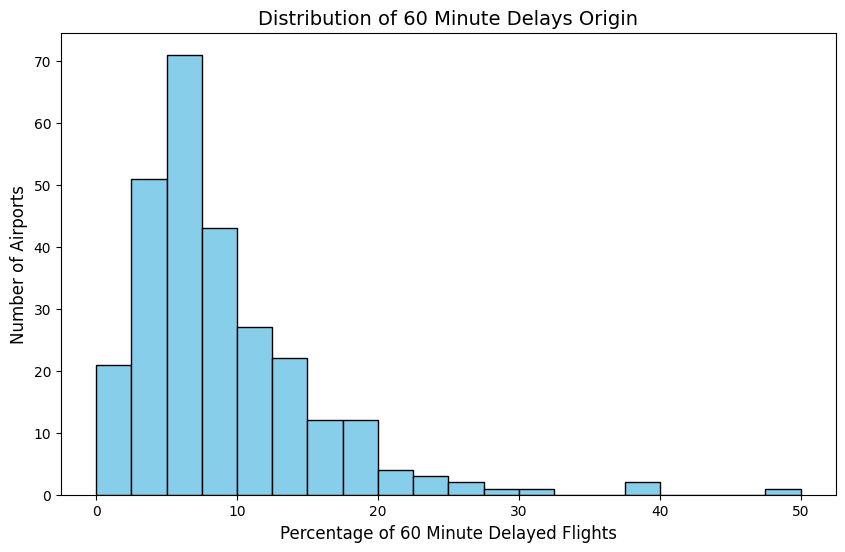

In [40]:
# plot histogram
plt.figure(figsize=(10, 6))
plt.hist(pct_delay_by_origin, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of 60 Minute Delays Origin', fontsize=14)
plt.xlabel('Percentage of 60 Minute Delayed Flights', fontsize=12)
plt.ylabel('Number of Airports', fontsize=12)

# Show the plot
plt.show()

###  Initialize and Fix the XGBoost classifier (baseline model)

In [42]:
xgb_model = xgb.XGBClassifier(random_state=0,
                              evel_metric='logloss')

In [43]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, evel_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [44]:
# Train the model
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:11:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "evel_metric" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, evel_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

## **Predct on the test set**

In [45]:
y_pred = xgb_model.predict(x_test)

## **Evaluate the model**

In [46]:
print("XGBoost Classifier (Baseline):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


XGBoost Classifier (Baseline):
Accuracy: 0.9254


In [47]:
# confusion metrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[134407,     89],
       [ 10757,    113]])

In [48]:
# Predict probabilities for the test set (to calculate AUC)
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1] # We need probabolities for the positive class

# calculate the AUC  score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7120


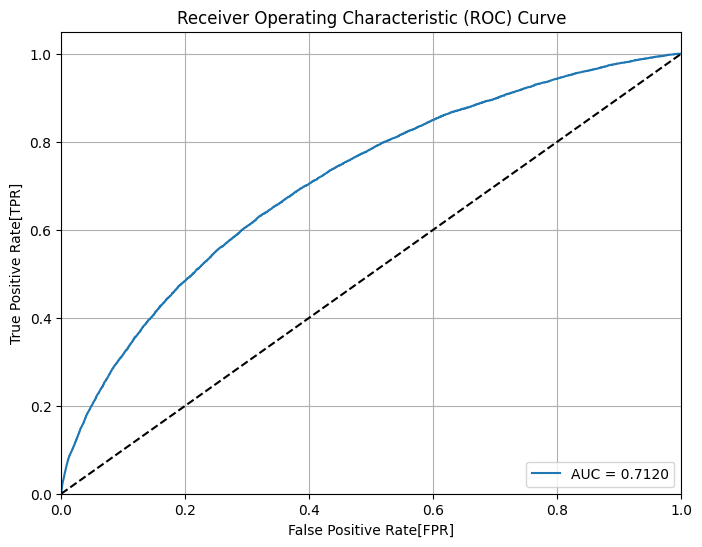

In [51]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate[FPR]')
plt.ylabel('True Positive Rate[TPR]')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## **Do cross-validated grid search**

In [56]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 250],
    'subsample': [0.6, 1.0]}

In [57]:
#Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0,
eval_metric='logloss')

In [58]:
#Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
param_grid=param_grid,
cv=3,
scoring='roc_auc',
verbose=1,
n_jobs=-1)

### Evaluate best parameters and predict on training set

# Task
Okay, I will continue with the plan.

First, I will re-initialize the XGBoost model.
Then, I will set up the `GridSearchCV` object.
After that, I will run the `GridSearchCV` to fit the model to the training data. This step might take some time to complete.
Once the grid search is complete, I will retrieve and print the best parameters found.
Finally, I will evaluate the tuned model by calculating and printing its accuracy, confusion matrix, and AUC score, and then plot its ROC curve.
I will conclude by summarizing the performance and insights.
Executing cell `2DFHUk9h05bk`.

## Re-Initialize XGBoost Model for GridSearch

### Subtask:
Re-initialize the XGBoost Classifier with specified parameters for the grid search.


**Reasoning**:
The instruction explicitly states to execute cell `2DFHUk9h05bk` to re-initialize the XGBoost Classifier. This cell creates an instance of `xgb.XGBClassifier` with `random_state=0` and `eval_metric='logloss'`.



In [66]:
#Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0,
eval_metric='logloss')

**Reasoning**:
The next step in the plan is to set up the `GridSearchCV` object using the re-initialized `xgb_model` and the defined `param_grid`. This involves executing cell `fGnpWgxV05Zn`.



In [67]:
#Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
param_grid=param_grid,
cv=3,
scoring='roc_auc',
verbose=1,
n_jobs=-1)

**Reasoning**:
The previous execution of `grid_search.fit()` was interrupted. To continue with the plan of evaluating the tuned model, I need to fit the grid search model to the training data again. This step is crucial for finding the best parameters and will correspond to executing cell `cJ9B6-7505Wn`.



In [68]:
# Fit the grid search model
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


KeyboardInterrupt: 